<a href="https://colab.research.google.com/github/rdhalwala/rdhalwala.github.io/blob/main/Data_Science_Rat_Sightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rats of New York

# Project Goals

[Link to our GitHub](https://github.com/rdhalwala/rdhalwala.github.io/blob/main/Data_Science_Rat_Sightings.ipynb)

The team, **Miranda Diaz and Raiya Dhawala** will likely be investigating data sets related to rat sightings in New York City and how they have been affected by COVID-19, the introduction of the “rat czar”, and the frequency by bourough.


  # Project Dataset
  The data set we are considering working with is [Rat Sightings](https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe). This data set contains information on rat sightings in New York City from 2010 to present day based on service requests made by the community. The data is from [311 service requests](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). Each row is different rat sighting with a unique key, which describes the unique identifier of the Service Request and in theory a different rat, although there is no way to be sure. Some columns describe the address, the date, the streets, the landmark and the borough of where each rat was seen. There is also a column which shows when the service request was created. We can use this to divide rat sightings by month or year. We were interested in using this data set because it provides data that can be relevant when answering different questions, such as, “How have rat sightings been affected by the introduction of the rat czar Kathleen Corradi.” and “How have right sightings increased or decreased in different boroughs since COVID-19”. Some further data may need to be brought in to assess COVID-19 numbers in different New York City neighborhoods. Also, further data could look at the population of different neighborhoods, and whether certain neighborhoods make more 311 requests than others.


# Collaboration Plan
Our collaboration plan is to meet on Thursdays around 4:30 to work on the final project. We will be communicating through text messages to keep each other updated and organized. We will be using google docs to draft things and then transfer it into google colab.

# ETL (Extraction, Transform, and Load)
We loaded our dataset into the dataset folder. This dataset originally has 38 columns showing things such as the date the request was created, the agency name, the location (including neighborhood and address), and the status of the complaint. The original data included various descriptors of location including latitude, longitude, and cross streets. We tidied the data by getting rid of the repetitive location columns such as cross street 1 and 2, and only keeping the incident address and neighborhood. We created a month, year column and set it as the index.



In [52]:
#import pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#mount drive
from google.colab import drive

drive.mount('/content/drive')

#read in rat csv
rat_df = pd.read_csv('/content/drive/My Drive/Rat_Sightings.csv')

#display it
rat_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-52-de1a53ac8c63>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  rat_df = pd.read_csv('/content/drive/My Drive/Rat_Sightings.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15636547,01/02/2010 09:38:29 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11432.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.703342,-73.800203,"(40.70334174980328, -73.80020318978804)"
1,15636689,01/02/2010 07:09:56 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,11204.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608288,-73.977775,"(40.60828832742201, -73.97777515791093)"
2,15636710,01/02/2010 09:04:46 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726060,-73.848329,"(40.726059538480236, -73.84832900182792)"
3,15636731,01/02/2010 06:27:59 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677957,-73.918921,"(40.67795748580213, -73.91892129635086)"
4,15636907,01/02/2010 12:50:16 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866008,-73.919401,"(40.86600810878767, -73.9194006525354)"


In [54]:
#get rid of unnecesary columns
rat_df.drop(columns = ['Closed Date','Agency', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Landmark', 'Status','Due Date','Resolution Action Updated Date', 'Street Name', 'City', 'Facility Type', 'Due Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location' ], inplace=True)

#display it
rat_df.head()

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Community Board,Borough,Park Facility Name,Park Borough
0,15636547,01/02/2010 09:38:29 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11432.0,NaN,12 QUEENS,QUEENS,Unspecified,QUEENS
1,15636689,01/02/2010 07:09:56 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,11204.0,NaN,11 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN
2,15636710,01/02/2010 09:04:46 AM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,06 QUEENS,QUEENS,Unspecified,QUEENS
3,15636731,01/02/2010 06:27:59 PM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,03 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN
4,15636907,01/02/2010 12:50:16 PM,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN


In [55]:
#display datatypes
display(rat_df.dtypes)

Unique Key              int64
Created Date           object
Agency Name            object
Complaint Type         object
Descriptor             object
Location Type          object
Incident Zip          float64
Incident Address       object
Community Board        object
Borough                object
Park Facility Name     object
Park Borough           object
dtype: object

In [56]:
#use to_datetime function to change Created Date to Datetime format so we can extract month and year
rat_df['Created Date'] = pd.to_datetime(rat_df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract month and year into new columns
rat_df['Month'] = rat_df['Created Date'].dt.month
rat_df['Year'] = rat_df['Created Date'].dt.year

#set Created Date as index
rat_df.set_index("Created Date").head()


,Unique Key,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Community Board,Borough,Park Facility Name,Park Borough,Month,Year
Created Date,,,,,,,,,,,,,
2010-01-02 09:38:29,15636547,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11432.0,NaN,12 QUEENS,QUEENS,Unspecified,QUEENS,1,2010
2010-01-02 07:09:56,15636689,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,11204.0,NaN,11 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,1,2010
2010-01-02 09:04:46,15636710,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11375.0,68-12 YELLOWSTON BOULEVARD,06 QUEENS,QUEENS,Unspecified,QUEENS,1,2010
2010-01-02 18:27:59,15636731,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11233.0,1040 HERKIMER STREET,03 BROOKLYN,BROOKLYN,Unspecified,BROOKLYN,1,2010
2010-01-02 12:50:16,15636907,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10034.0,241 SHERMAN AVENUE,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,1,2010


In [57]:
#show frequency of rat sightings by borough
rat_df['Borough'].value_counts()

BROOKLYN         83461
MANHATTAN        60699
BRONX            41917
QUEENS           34507
STATEN ISLAND     9213
Unspecified         33
Name: Borough, dtype: int64

This shows us how many rats have been sighted per borough. Brooklyn is the highest.

In [58]:
rat_df['Location Type'].value_counts()

3+ Family Apt. Building          94821
1-2 Family Dwelling              43263
Other (Explain Below)            35751
3+ Family Mixed Use Building     15123
Commercial Building              12705
Vacant Lot                        6171
Construction Site                 5225
1-2 Family Mixed Use Building     3813
Vacant Building                   3697
Parking Lot/Garage                2410
Catch Basin/Sewer                 2243
Public Garden                      974
3+ Family Apartment Building       658
Government Building                493
Street Area                        434
School/Pre-School                  394
Single Room Occupancy (SRO)        265
Day Care/Nursery                   233
Office Building                    220
Residential Building               215
Public Stairs                      193
Hospital                           151
Apartment                           82
Other                               76
Residence                           72
Building (Non-Residential

This shows us what type of location rats are most commonly sighted at. This also gives us information as to where people report rat sightings.

In [59]:
rat_df['Community Board'].value_counts()

Unspecified BROOKLYN     10977
03 BROOKLYN              10891
07 MANHATTAN              9539
Unspecified MANHATTAN     8884
10 MANHATTAN              8050
                         ...  
28 BRONX                     4
27 BRONX                     3
26 BRONX                     3
84 QUEENS                    3
95 STATEN ISLAND             2
Name: Community Board, Length: 74, dtype: int64

Unspecified Brooklyn and Brooklyn community Board 03 have the most sightings. This is important because we can investigate why these neighborhoods might have the most sightings/reports. It is more specific than the borough generally.

<Axes: ylabel='Frequency'>

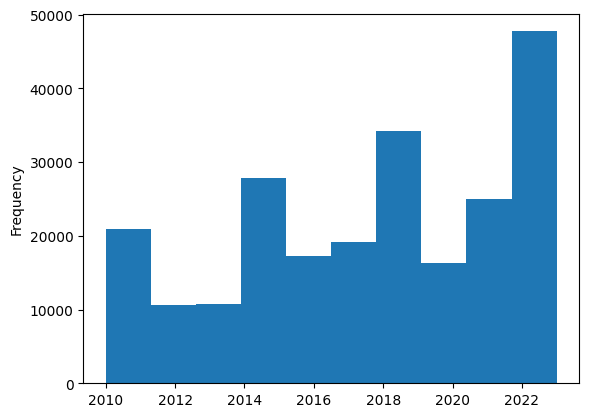

In [51]:
#display rat frequency per year
rat_df.Year.plot.hist()

The rat sightings have increased over time. This could bbe due to multiple factors including the amount of people that call 311 to report a rat. There is a dip in 2020 and 2021 (Covid years) because people were not goign outside as much. In the future, we will incorporate COVID related data and see how it correlates to rat sightings.